# 240902: Make pe.py script
- Obtain PE saturation mutagenesis libraries from PrimeDesign
- Generate epegRNA motif linkers using pegLIT.py
- Distill PE library into spacer and PBS motifs.

In [1]:
import os
import numpy as np
import pandas as pd
import pyMUZ.gen.io as io
import pegLIT as pegLIT

## PrimeDesign: Command line interaction
Done.

In [15]:
''' PrimeDesign: Run PrimeDesign using Docker
        file (str): Input file (.txt or .csv) with sequences for PrimeDesign. Format: target_name,target_sequence (column names required)
        pbs_length_list (list): List of primer binding site (PBS) lengths for the pegRNA extension. Example: 12 13 14 15
        rtt_length_list (list): List of reverse transcription (RT) template lengths for the pegRNA extension. Example: 10 15 20
        nicking_distance_minimum (int): Minimum nicking distance for designing ngRNAs. (Default: 0 bp)
        nicking_distance_maximum (int): Maximum nicking distance for designing ngRNAs. (Default: 100 bp)
        filter_c1_extension (bool): Filter against pegRNA extensions that start with a C base. (Default: False)
        silent_mutation (bool): Introduce silent mutation into PAM assuming sequence is in-frame. Currently only available with SpCas9. (Default: False)
        genome_wide_design (bool): Whether this is a genome-wide pooled design. This option designs a set of pegRNAs per input without ranging PBS and RTT parameters.
        saturation_mutagenesis (str): Saturation mutagenesis design with prime editing (Options: 'aa', 'base').
        number_of_pegrnas (int): Maximum number of pegRNAs to design for each input sequence. The pegRNAs are ranked by 1) PAM disrupted > PAM intact then 2) distance to edit. (Default: 3)
        number_of_ngrnas (int): Maximum number of ngRNAs to design for each input sequence. The ngRNAs are ranked by 1) PE3b-seed > PE3b-nonseed > PE3 then 2) deviation from nicking_distance_pooled. (Default: 3)
        nicking_distance_pooled (int): The nicking distance between pegRNAs and ngRNAs for pooled designs. PE3b annotation is priority (PE3b seed -> PE3b non-seed), followed by nicking distance closest to this parameter. (Default: 75 bp)
        homology_downstream (int): For pooled designs (genome_wide or saturation_mutagenesis needs to be indicated), this parameter determines the RT extension length downstream of an edit for pegRNA designs. (Default: 10)
        pbs_length_pooled (int): The PBS length to design pegRNAs for pooled design applications. (Default: 14 nt)
        rtt_max_length_pooled (int): Maximum RTT length to design pegRNAs for pooled design applications. (Default: 50 nt)
        out_dir (str): Name of output directory. (Default: ./DATETIMESTAMP_PrimeDesign)
    Dependencies: os,numpy,https://github.com/pinellolab/PrimeDesign
'''
def PrimeDesign(file: str,pbs_length_list: list = [],rtt_length_list: list = [],nicking_distance_minimum: int = 0,
                nicking_distance_maximum: int = 100,filter_c1_extension: bool = False,silent_mutation: bool = False,
                genome_wide_design: bool = False,saturation_mutagenesis: str = None,number_of_pegrnas: int = 3,number_of_ngrnas: int = 3,
                nicking_distance_pooled: int = 75,homology_downstream: int = 10,pbs_length_pooled: int = 14,rtt_max_length_pooled: int = 50,
                out_dir: str = './DATETIMESTAMP_PrimeDesign'):
    
    # Write PrimeDesign Command Line
    cmd = 'docker run -v ${PWD}/:/DATA -w /DATA pinellolab/primedesign primedesign_cli' # prefix
    cmd += f' -f {file}' # Append required parameters
    if pbs_length_list: cmd += f' -pbs {str(np.array(pbs_length_list))[1:-1]}' # Append optional parameters
    if rtt_length_list: cmd += f' -rtt {str(np.array(rtt_length_list))[1:-1]}'
    if nicking_distance_minimum!=0: cmd += f' -nick_dist_min {str(nicking_distance_minimum)}' 
    if nicking_distance_maximum!=100: cmd += f' -nick_dist_max {str(nicking_distance_maximum)}'
    if filter_c1_extension: cmd += f' -filter_c1 {str(filter_c1_extension)}'
    if silent_mutation: cmd += f' - silent_mut'
    if genome_wide_design: cmd += f' -genome_wide'
    if saturation_mutagenesis: cmd += f' -sat_mut {saturation_mutagenesis}'
    if number_of_pegrnas!=3: cmd += f' -n_pegrnas {number_of_pegrnas}'
    if number_of_ngrnas!=3: cmd += f' -n_ngrnas {number_of_ngrnas}'
    if nicking_distance_pooled!=75: cmd += f' -nick_dist_pooled {nicking_distance_pooled}'
    if homology_downstream!=10: cmd += f' -homology_downstream {homology_downstream}'
    if pbs_length_pooled!=14: cmd += f' -pbs_pooled {pbs_length_pooled}'
    if rtt_max_length_pooled!=50: cmd += f' -rtt_pooled {rtt_max_length_pooled}'
    if out_dir!='./DATETIMESTAMP_PrimeDesign': cmd+= f' -out ./DATETIMESTAMP_PrimeDesign'
    print(cmd)

    os.system(cmd) # Execute PrimeDesign Command Line

# PrimeDesignOutput: Split pegRNAs and ngRNAs; finish annotating

In [2]:
out = io.get('/Users/marczepeda/Documents/Liau_Lab/Projects/2.ZF_degraders/4.Computational/MUZ88/PrimeDesign/240209_17.35.07_PrimeDesign/20240209_05.35.18_PrimeDesign.csv')
out

,Target_name,Target_sequence,pegRNA_number,gRNA_type,Spacer_sequence,Spacer_GC_content,PAM_sequence,Extension_sequence,Strand,Annotation,...,ngRNA-to-pegRNA_distance,PBS_length,PBS_GC_content,RTT_length,RTT_GC_content,First_extension_nucleotide,Spacer_sequence_order_TOP,Spacer_sequence_order_BOTTOM,pegRNA_extension_sequence_order_TOP,pegRNA_extension_sequence_order_BOTTOM
0,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,1,pegRNA,CCCGCACTGATTGCACTGGA,0.60,AGG-to-cag,AGAACGGcctggcCAGTGCAATCAGTGC,-,PAM_disrupted_silent_mutation,...,NaN,14.0,0.50,14.0,0.71,A,caccGCCCGCACTGATTGCACTGGAgtttt,ctctaaaacTCCAGTGCAATCAGTGCGGGC,gtgcAGAACGGcctggcCAGTGCAATCAGTGC,aaaaGCACTGATTGCACTGgccaggCCGTTCT
1,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,1,ngRNA,tggcCAGTGCAATCAGTGCG,0.60,GGG,NaN,+,PE3b-nonseed,...,12.0,NaN,NaN,NaN,NaN,NaN,caccGtggcCAGTGCAATCAGTGCG,aaacCGCACTGATTGCACTGgccaC,NaN,NaN
2,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,1,ngRNA,ctggcCAGTGCAATCAGTGC,0.60,GGG,NaN,+,PE3b-nonseed,...,11.0,NaN,NaN,NaN,NaN,NaN,caccGctggcCAGTGCAATCAGTGC,aaacGCACTGATTGCACTGgccagC,NaN,NaN
3,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,1,ngRNA,cctggcCAGTGCAATCAGTG,0.60,CGG,NaN,+,PE3b-nonseed,...,10.0,NaN,NaN,NaN,NaN,NaN,caccGcctggcCAGTGCAATCAGTG,aaacCACTGATTGCACTGgccaggC,NaN,NaN
4,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,2,pegRNA,AGGCCCCGCACTGATTGCAC,0.65,TGG-to-tgc,AGAACGGCCCgggCAGTGCAATCAGTGCGGGG,-,PAM_disrupted_silent_mutation,...,NaN,14.0,0.64,18.0,0.72,A,caccGAGGCCCCGCACTGATTGCACgtttt,ctctaaaacGTGCAATCAGTGCGGGGCCTC,gtgcAGAACGGCCCgggCAGTGCAATCAGTGCGGGG,aaaaCCCCGCACTGATTGCACTGcccGGGCCGTTCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,C2H2-type 2 and 3_51_HtoP,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,3059,ngRNA,CGTtctCAGGTGGCCAGTGA,0.60,GGG,NaN,-,PE3b-nonseed,...,-8.0,NaN,NaN,NaN,NaN,NaN,caccGCGTtctCAGGTGGCCAGTGA,aaacTCACTGGCCACCTGagaACGC,NaN,NaN
12236,C2H2-type 2 and 3_51_HtoP,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,3060,pegRNA,CAGCCCCGGACTGCATCCAG,0.70,GGG-to-ggc,CCTGAGGACGcccTCCGGTAGGagcCCTGGATGCAGTCCGGGG,-,PAM_disrupted_silent_mutation,...,NaN,14.0,0.71,29.0,0.72,C,caccGCAGCCCCGGACTGCATCCAGgtttt,ctctaaaacCTGGATGCAGTCCGGGGCTGC,gtgcCCTGAGGACGcccTCCGGTAGGagcCCTGGATGCAGTCCGGGG,aaaaCCCCGGACTGCATCCAGGgctCCTACCGGAgggCGTCCTCAGG
12237,C2H2-type 2 and 3_51_HtoP,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,3060,ngRNA,GGCCACCTGAGGACGcccTC,0.75,CGG,NaN,+,PE3b-seed,...,-17.0,NaN,NaN,NaN,NaN,NaN,caccGGCCACCTGAGGACGcccTC,aaacGAgggCGTCCTCAGGTGGCC,NaN,NaN
12238,C2H2-type 2 and 3_51_HtoP,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,3060,ngRNA,ACCTGAGGACGcccTCCGGT,0.70,AGG,NaN,+,PE3b-seed,...,-13.0,NaN,NaN,NaN,NaN,NaN,caccGACCTGAGGACGcccTCCGGT,aaacACCGGAgggCGTCCTCAGGTC,NaN,NaN


In [9]:
''' PrimeDesignOutput: Splits peg/ngRNAs from PrimeDesign output & finishes annotations
        pt: path to primeDesign output
        aa_index: 1st amino acid in target sequence index (Optional, Default: start codon = 1)
        scaffold_sequence: sgRNA scaffold sequence (Optional, Default: SpCas9)
    Dependencies: io,numpy
'''
def PrimeDesignOutput(pt: str, aa_index: int=1, 
                      scaffold_sequence: str='GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCTAGTCCGTTATCAACTTGGCTGAATGCCTGCGAGCATCCCACCCAAGTGGCACCGAGTCGGTGC'):
    
    # Get PrimeDesign output & seperate pegRNAs and ngRNAs
    primeDesign_output = io.get(pt)
    pegRNAs = primeDesign_output[primeDesign_output['gRNA_type']=='pegRNA']
    ngRNAs = primeDesign_output[primeDesign_output['gRNA_type']=='ngRNA']

    # Generate epegRNAs
    pegRNAs['Edit']=[str(target_name.split('_')[2].split('to')[0]) + # AA Before
                    str(int(target_name.split('_')[1]) + aa_index-1) + # AA Index
                    str(target_name.split('_')[2].split('to')[1]) # AA After
                    for target_name in pegRNAs['Target_name']]
    pegRNAs['Scaffold_sequence']=[scaffold_sequence]*len(pegRNAs)
    pegRNAs['RTT_sequence']=[pegRNAs.iloc[i]['Extension_sequence'][0:int(pegRNAs.iloc[i]['RTT_length'])] for i in range(len(pegRNAs))]
    pegRNAs['PBS_sequence']=[pegRNAs.iloc[i]['Extension_sequence'][int(pegRNAs.iloc[i]['RTT_length']):]  for i in range(len(pegRNAs))]
    pegRNAs=pegRNAs[['pegRNA_number','gRNA_type','Strand','Edit', # Important metadata
                     'Spacer_sequence','Scaffold_sequence','RTT_sequence','PBS_sequence', # Sequence information
                     'Target_name','Target_sequence','Spacer_GC_content','PAM_sequence','Extension_sequence','Annotation','pegRNA-to-edit_distance','Nick_index','ngRNA-to-pegRNA_distance','PBS_length','PBS_GC_content','RTT_length','RTT_GC_content','First_extension_nucleotide']] # Less important metadata

    # Generate ngRNAs
    ngRNAs['Edit']=[str(target_name.split('_')[2].split('to')[0]) + # AA Before
                    str(int(target_name.split('_')[1]) + aa_index-1) + # AA Index
                    str(target_name.split('_')[2].split('to')[1]) # AA After
                    for target_name in ngRNAs['Target_name']]
    ngRNAs['Scaffold_sequence']=[scaffold_sequence]*len(ngRNAs)
    ngRNAs['ngRNA_number']=list(np.arange(len(ngRNAs)))
    ngRNAs=ngRNAs[['pegRNA_number','ngRNA_number','gRNA_type','Strand','Edit', # Important metadata
                   'Spacer_sequence','Scaffold_sequence', # Sequence information
                   'Target_name','Target_sequence','Spacer_GC_content','PAM_sequence','Extension_sequence','Annotation','pegRNA-to-edit_distance','Nick_index','ngRNA-to-pegRNA_distance','PBS_length','PBS_GC_content','RTT_length','RTT_GC_content','First_extension_nucleotide']] # Less important metadata

    return pegRNAs,ngRNAs

In [10]:
pegRNAs,ngRNAs = PrimeDesignOutput(pt='/Users/marczepeda/Documents/Liau_Lab/Projects/2.ZF_degraders/4.Computational/MUZ88/PrimeDesign/240209_17.35.07_PrimeDesign/20240209_05.35.18_PrimeDesign.csv',
                                   aa_index=144)

/var/folders/x1/n35ck2wn4_v9ylrlq_f8z0b00000gp/T/ipykernel_20033/3050305335.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pegRNAs['Edit']=[str(target_name.split('_')[2].split('to')[0]) + # AA Before
/var/folders/x1/n35ck2wn4_v9ylrlq_f8z0b00000gp/T/ipykernel_20033/3050305335.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pegRNAs['Scaffold_sequence']=[scaffold_sequence]*len(pegRNAs)
/var/folders/x1/n35ck2wn4_v9ylrlq_f8z0b00000gp/T/ipykernel_20033/3050305335.py:22: SettingWithCopyWarning: 
A value

In [11]:
pegRNAs.head()

,pegRNA_number,gRNA_type,Strand,Edit,Spacer_sequence,Scaffold_sequence,RTT_sequence,PBS_sequence,Target_name,Target_sequence,...,Extension_sequence,Annotation,pegRNA-to-edit_distance,Nick_index,ngRNA-to-pegRNA_distance,PBS_length,PBS_GC_content,RTT_length,RTT_GC_content,First_extension_nucleotide
0,1,pegRNA,-,F144G,CCCGCACTGATTGCACTGGA,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,AGAACGGcctggcC,AGTGCAATCAGTGC,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,...,AGAACGGcctggcCAGTGCAATCAGTGC,PAM_disrupted_silent_mutation,4.0,322,NaN,14.0,0.50,14.0,0.71,A
4,2,pegRNA,-,F144G,AGGCCCCGCACTGATTGCAC,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,AGAACGGCCCgggCAGTG,CAATCAGTGCGGGG,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,...,AGAACGGCCCgggCAGTGCAATCAGTGCGGGG,PAM_disrupted_silent_mutation,8.0,326,NaN,14.0,0.64,18.0,0.72,A
8,3,pegRNA,+,F144G,CTCTCTCCGTCCCAGGAGAA,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,GATTGCACTGgccGGGtctTTC,TCCTGGGACGGAGA,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,...,GATTGCACTGgccGGGtctTTCTCCTGGGACGGAGA,PAM_disrupted_silent_mutation,12.0,309,NaN,14.0,0.64,22.0,0.59,G
12,4,pegRNA,-,F144E,CCCGCACTGATTGCACTGGA,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,AGAACGGcctgagC,AGTGCAATCAGTGC,C2H2-type 2 and 3_1_FtoE,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,...,AGAACGGcctgagCAGTGCAATCAGTGC,PAM_disrupted_silent_mutation,4.0,322,NaN,14.0,0.50,14.0,0.64,A
16,5,pegRNA,-,F144E,AGGCCCCGCACTGATTGCAC,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,AGAACGGCCCgagCAGTG,CAATCAGTGCGGGG,C2H2-type 2 and 3_1_FtoE,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,...,AGAACGGCCCgagCAGTGCAATCAGTGCGGGG,PAM_disrupted,8.0,326,NaN,14.0,0.64,18.0,0.67,A


In [12]:
ngRNAs.head()

,pegRNA_number,ngRNA_number,gRNA_type,Strand,Edit,Spacer_sequence,Scaffold_sequence,Target_name,Target_sequence,Spacer_GC_content,...,Extension_sequence,Annotation,pegRNA-to-edit_distance,Nick_index,ngRNA-to-pegRNA_distance,PBS_length,PBS_GC_content,RTT_length,RTT_GC_content,First_extension_nucleotide
1,1,0,ngRNA,+,F144G,tggcCAGTGCAATCAGTGCG,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,0.60,...,NaN,PE3b-nonseed,NaN,334,12.0,NaN,NaN,NaN,NaN,NaN
2,1,1,ngRNA,+,F144G,ctggcCAGTGCAATCAGTGC,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,0.60,...,NaN,PE3b-nonseed,NaN,333,11.0,NaN,NaN,NaN,NaN,NaN
3,1,2,ngRNA,+,F144G,cctggcCAGTGCAATCAGTG,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,0.60,...,NaN,PE3b-nonseed,NaN,332,10.0,NaN,NaN,NaN,NaN,NaN
5,2,3,ngRNA,+,F144G,CgggCAGTGCAATCAGTGCG,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,0.65,...,NaN,PE3b-nonseed,NaN,334,8.0,NaN,NaN,NaN,NaN,NaN
6,2,4,ngRNA,+,F144G,CCgggCAGTGCAATCAGTGC,GTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCT...,C2H2-type 2 and 3_1_FtoG,AAACTGCTGATCAGGAAGAGTGGCTCTTCATCACAAAATGTTGCAG...,0.65,...,NaN,PE3b-nonseed,NaN,333,7.0,NaN,NaN,NaN,NaN,NaN


# epegRNA_linkers: Generate epegRNAs

In [13]:
''' epegRNA_linkers: Generate epegRNA linkers between PBS and 3' hairpin motif & finish annotations
        pegRNAs: pegRNAs DataFrame
        epegRNA_motif_sequence: epegRNA motif sequence (Optional, Default: tevopreQ1)
        checkpoint_dir: Checkpoint directory (Optional)
        checkpoint_file: Checkpoint file name (Optional)
        checkpoint_pt: Previous checkpoint path (Optional)
    Dependencies: pandas,pegLIT,io
'''
def epegRNA_linkers(pegRNAs: pd.DataFrame, epegRNA_motif_sequence: str='CGCGGTTCTATCTAGTTACGCGTTAAACCAACTAGAA',
                    checkpoint_dir: str=None, checkpoint_file=None, checkpoint_pt: str=None):
    
    # Get or make checkpoint DataFrame
    if checkpoint_pt: checkpoint = pd.DataFrame(columns=['pegRNA_number','Linker_sequence'])
    else: checkpoint = io.get(pt=checkpoint_pt)

    # Generate epegRNA linkers between PBS and 3' hairpin motif
    linkers = []
    for i in range(len(pegRNAs)):
        if i>=len(checkpoint):
            linkers.extend(pegLIT.pegLIT(seq_spacer=pegRNAs.iloc[i]['Spacer_sequence'],seq_scaffold=pegRNAs.iloc[i]['Scaffold_sequence'],
                                        seq_template=pegRNAs.iloc[i]['RTT_sequence'],seq_pbs=pegRNAs.iloc[i]['PBS_sequence'],
                                        seq_motif=epegRNA_motif_sequence))
            if checkpoint_dir is not None & checkpoint_file is not None: # Save checkpoints
                checkpoint = pd.concat([checkpoint,pd.DataFrame({'pegRNA_number': [i], 'Linker_sequence': [linkers[i]]})])
                io.save(dir=checkpoint_dir,file=checkpoint_file,obj=checkpoint)
            print(f'Status: {i} out of {len(pegRNAs)}')
    
    # Generate epegRNAs
    pegRNAs['Linker_sequence'] = linkers
    pegRNAs['Motif_sequence'] = [epegRNA_motif_sequence]*len(pegRNAs)
    epegRNAs = pegRNAs[['pegRNA_number','gRNA_type','Strand','Edit', # Important metadata
                        'Spacer_sequence','Scaffold_sequence','RTT_sequence','PBS_sequence','Linker_sequence','Motif_sequence', # Sequence information
                        'Target_name','Target_sequence','Spacer_GC_content','PAM_sequence','Extension_sequence','Annotation','pegRNA-to-edit_distance','Nick_index','ngRNA-to-pegRNA_distance','PBS_length','PBS_GC_content','RTT_length','RTT_GC_content','First_extension_nucleotide']] # Less important metadata
    return epegRNAs

# shared_sequences: Find shared spacers and PBS motifs

In [52]:
import pyMUZ.gen.plot as p

In [73]:
''' PrimeDesignFeatures: Distill PE library into shared spacers and PBS sequences.
        pegRNAs: pegRNAs DataFrame
    Dependencies: pandas,plot
'''
def PrimeDesignFeatures(pegRNAs: pd.DataFrame, hist_plot:bool=True, hist_dir: str=None, hist_file=None):
    
    # Reduce PE library to the set shared of spacers and PBS motifs
    shared = {(pegRNAs.iloc[i]['Spacer_sequence'],pegRNAs.iloc[i]['PBS_sequence']) for i in range(len(pegRNAs))}
    shared_lib = pd.DataFrame(columns=['pegRNA_numbers','Strand','Edits','Spacer_sequence','PBS_sequence'])
    for (spacer,pbs) in shared:
        shared_pegRNAs = pegRNAs[(pegRNAs['Spacer_sequence']==spacer)&(pegRNAs['PBS_sequence']==pbs)]
        shared_lib = pd.concat([shared_lib,pd.DataFrame({'pegRNA_numbers': [shared_pegRNAs['pegRNA_number'].to_list()],
                                                        'Strand': [shared_pegRNAs.iloc[0]['Strand']],
                                                        'Edits': [shared_pegRNAs['Edit'].to_list()],
                                                        'Spacer_sequence': [spacer],
                                                        'PBS_sequence': [pbs]})]).reset_index(drop=True)
    
    # Find shared AAs within the reduced PE library
    aa_numbers_ls=[]
    aa_numbers_min_ls=[]
    aa_numbers_max_ls=[]
    continous_ls=[]
    for edits in shared_lib['Edits']:
        aa_numbers = {int(edit[1:-1]) for edit in edits}
        aa_numbers_min = min(aa_numbers)
        aa_numbers_max = max(aa_numbers)
        if aa_numbers == set(range(aa_numbers_min,aa_numbers_max+1)): continous=True
        else: continous=False
        aa_numbers_ls.append(sorted(aa_numbers))
        aa_numbers_min_ls.append(aa_numbers_min)
        aa_numbers_max_ls.append(aa_numbers_max)
        continous_ls.append(continous)
    shared_lib['AA_numbers']=aa_numbers_ls
    shared_lib['AA_numbers_min']=aa_numbers_min_ls
    shared_lib['AA_numbers_max']=aa_numbers_max_ls
    shared_lib['AA_numbers_continuous']=continous_ls
    
    if hist_plot: # Generate histogram
        shared_hist = pd.DataFrame()
        for i,aa_numbers in enumerate(shared_lib['AA_numbers']):
            shared_hist = pd.concat([shared_hist,pd.DataFrame({'Group_Spacer_PBS': [f'{str(i)}_{shared_lib.iloc[i]["Spacer_sequence"]}_{shared_lib.iloc[i]["PBS_sequence"]}']*len(aa_numbers),
                                                               'AA_number': aa_numbers})]).reset_index(drop=True)
        p.dist(typ='hist',df=shared_hist,x='AA_number',cols='Group_Spacer_PBS',x_axis='AA number',title='Shared PE Library',
               x_axis_dims=(min(shared_hist['AA_number']),max(shared_hist['AA_number'])),y_axis_dims=(0,5),
               legend_loc='upper center',legend_bbox_to_anchor=(0.5, -0.1),dir=hist_dir,file=hist_file)

    return shared_lib

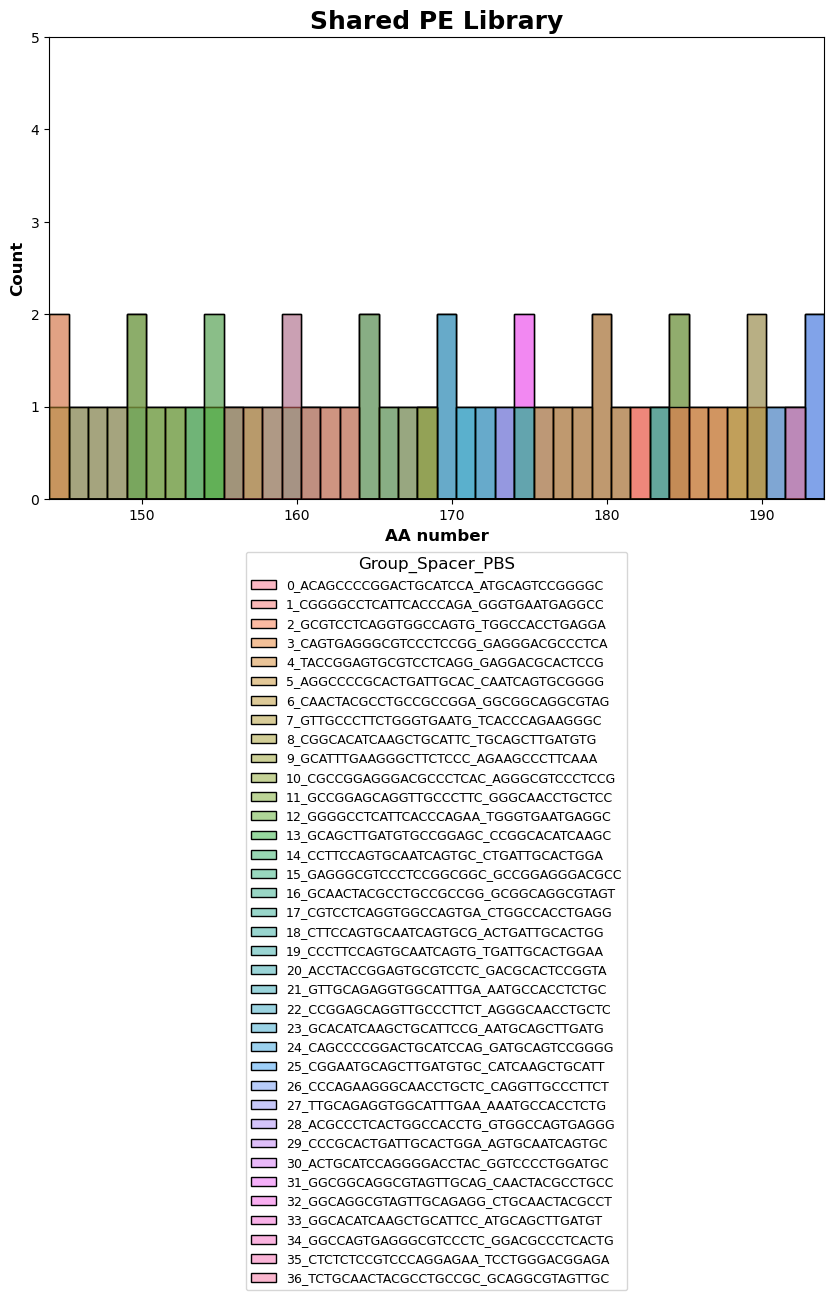

,pegRNA_numbers,Strand,Edits,Spacer_sequence,PBS_sequence,AA_numbers,AA_numbers_min,AA_numbers_max,AA_numbers_continuous
0,[2916],-,[R192W],ACAGCCCCGGACTGCATCCA,ATGCAGTCCGGGGC,[192],192,192,True
1,"[721, 724, 727, 730, 733, 736, 739, 742, 748, ...",+,"[K156G, K156E, K156D, K156V, K156A, K156R, K15...",CGGGGCCTCATTCACCCAGA,GGGTGAATGAGGCC,"[156, 157, 158, 159, 160, 161, 162, 163]",156,163,True
2,"[2436, 2522, 2525, 2528, 2531, 2534, 2537, 254...",-,"[R184W, A186G, A186E, A186D, A186V, A186R, A18...",GCGTCCTCAGGTGGCCAGTG,TGGCCACCTGAGGA,"[184, 186, 187]",184,187,False
3,"[1923, 1926, 1929, 1932, 1935, 1938, 1941, 194...",-,"[L176G, L176E, L176D, L176V, L176A, L176R, L17...",CAGTGAGGGCGTCCCTCCGG,GAGGGACGCCCTCA,"[176, 177, 178, 179, 180, 181, 182]",176,182,True
4,"[2641, 2644, 2647, 2650, 2653, 2656, 2659, 266...",-,"[T188G, T188E, T188D, T188V, T188A, T188R, T18...",TACCGGAGTGCGTCCTCAGG,GAGGACGCACTCCG,"[188, 189, 190]",188,190,True
5,"[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, ...",-,"[F144G, F144E, F144D, F144V, F144A, F144R, F14...",AGGCCCCGCACTGATTGCAC,CAATCAGTGCGGGG,"[144, 145]",144,145,True
6,"[2401, 2404, 2407, 2410, 2413, 2416, 2419, 242...",+,"[R184G, R184E, R184D, R184V, R184A, R184S, R18...",CAACTACGCCTGCCGCCGGA,GGCGGCAGGCGTAG,"[184, 185, 186, 187, 188]",184,188,True
7,"[63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 9...",-,"[Q145G, Q145E, Q145D, Q145V, Q145A, Q145R, Q14...",GTTGCCCTTCTGGGTGAATG,TCACCCAGAAGGGC,"[145, 146, 147, 148, 149, 150, 151, 152]",145,152,True
8,"[1467, 1475]",+,"[G168M, G168W]",CGGCACATCAAGCTGCATTC,TGCAGCTTGATGTG,[168],168,168,True
9,"[1056, 1082, 1085, 1088, 1091, 1094, 1097, 110...",-,"[R161W, H162G, H162E, H162D, H162V, H162A, H16...",GCATTTGAAGGGCTTCTCCC,AGAAGCCCTTCAAA,"[161, 162, 163, 164, 165, 166, 167, 168]",161,168,True


In [74]:
PrimeDesignFeatures(pegRNAs=pegRNAs)

In [75]:
import os
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supporting methods
''' re_un_cap: Replace underscores with spaces and capitalizes each word for a given string
        input_string: input string
'''
def re_un_cap(input_string):
    output_string = input_string.replace('_', ' ').title()
    return output_string

''' round_up_pow_10: Rounds a given number to the nearest power of 10
        number: input number
'''
def round_up_pow_10(number):
    if number == 0:
        return 0

    exponent = math.ceil(math.log10(abs(number)))
    rounded = math.ceil(number / 10 ** exponent) * 10 ** exponent
    return rounded

''' log10: Returns log10 of maximum value from series or 0
        series: series with values
'''
def log10(series):
    return np.log10(np.maximum(series, 1))

''' move_dis_legend: Moves legend for distribution graphs.
        ax: matplotlib axis
        legend loc: legend location
'''
def move_dist_legend(ax,legend_loc,legend_title_size,legend_size,legend_bbox_to_anchor,legend_ncol):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles,labels,loc=legend_loc,bbox_to_anchor=legend_bbox_to_anchor,
              title=title,title_fontsize=legend_title_size,fontsize=legend_size,ncol=legend_ncol)

''' formatter: Formats, displays, and saves plots.
        typ: plot type
        ax: matplotlib subplot
        df: tidy dataframe
    Dependencies: os, matplotlib, seaborn, re_un_cap(), round_up_pow_10():
'''
def formatter(typ,ax,df,x='x',y='y',cols='cols',file=None,dir=None,color_palette='colorblind',
              title='',title_size=18,title_weight='bold',
              x_axis='',x_axis_size=12,x_axis_weight='bold',x_axis_scale='linear',x_axis_dims=(0,100),x_ticks_rot=0,xticks=[],
              y_axis='',y_axis_size=12,y_axis_weight='bold',y_axis_scale='linear',y_axis_dims=(0,100),y_ticks_rot=0,yticks=[],
              legend_title='',legend_title_size=12,legend_size=12,legend_bbox_to_anchor=(1,1),legend_loc='upper left',legend_items=(0,0),legend_ncol=1):
    
    # Define plot types
    scats = ['scat', 'line', 'line_scat']
    cats = ['bar', 'box', 'violin', 'swarm', 'strip', 'point', 'count', 'bar_strip', 'box_strip', 'violin_strip','bar_swarm', 'box_swarm', 'violin_swarm']
    dists = ['hist', 'kde', 'hist_kde','rid']
    heats = ['ht']

    # Set color scheme
    sns.color_palette(color_palette)

    if typ not in heats:
        # Set title
        if title=='' and file is not None: title=re_un_cap(file[-4])
        plt.title(title, fontsize=title_size, fontweight=title_weight)
        
        # Set x axis
        if x_axis=='': x_axis=re_un_cap(x)
        plt.xlabel(x_axis, fontsize=x_axis_size, fontweight=x_axis_weight)
        if typ not in cats: 
            plt.xscale(x_axis_scale)
            if x_axis_dims==(0,100) and x_axis_scale=='log': plt.xlim(0,round_up_pow_10(max(df[x])))
            else: plt.xlim(x_axis_dims[0],x_axis_dims[1])
        if xticks==[]: 
            if (x_ticks_rot==0)|(x_ticks_rot==90): plt.xticks(rotation=x_ticks_rot,ha='center')
            else: plt.xticks(rotation=x_ticks_rot,ha='right')
        else: 
            if (x_ticks_rot==0)|(x_ticks_rot==90): plt.xticks(ticks=xticks,labels=xticks,rotation=x_ticks_rot, ha='center')
            else: plt.xticks(ticks=xticks,labels=xticks,rotation=x_ticks_rot,ha='right')

        # Set y axis
        if y_axis=='': y_axis=re_un_cap(y)
        plt.ylabel(y_axis, fontsize=y_axis_size, fontweight=y_axis_weight)
        plt.yscale(y_axis_scale)
        if y_axis_dims==(0,100) and y_axis_scale=='log': plt.ylim(0,round_up_pow_10(max(df[y])))
        else: plt.ylim(y_axis_dims[0],y_axis_dims[1])
        if yticks==[]: plt.yticks(rotation=y_ticks_rot)
        else: plt.yticks(ticks=yticks,labels=yticks,rotation=y_ticks_rot)

        # Set legend
        if legend_title=='': legend_title=cols
        if legend_items==(0,0) and typ not in dists:
            ax.legend(title=legend_title,title_fontsize=legend_title_size,fontsize=legend_size,
                    bbox_to_anchor=legend_bbox_to_anchor,loc=legend_loc,ncol=legend_ncol) # Move legend to the right of the graph
        elif typ not in dists:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(title=legend_title,title_fontsize=legend_title_size,fontsize=legend_size,
                    bbox_to_anchor=legend_bbox_to_anchor,loc=legend_loc,ncol=legend_ncol, # Move right of the graph
                    handles=handles[legend_items[0]:legend_items[1]],labels=labels[legend_items[0]:legend_items[1]]) # Only retains specified labels
        else: move_dist_legend(ax,legend_loc,legend_title_size,legend_size,legend_bbox_to_anchor,legend_ncol)

    # Save & show fig
    if file is not None and dir is not None:
        if not os.path.exists(dir):
            os.mkdir(dir)
        plt.savefig(fname=os.path.join(dir, file), dpi=600, bbox_inches='tight')
    plt.show()

''' dist: Creates distribution graphs.
        typ: plot type (hist, kde, hist_kde, rid)
        df: tidy dataframe
        x: x-axis column
    Dependencies: os, matplotlib, seaborn, formatter(), re_un_cap(), round_up_pow_10()
'''
def dist(typ: str,df: pd.DataFrame,x: str,cols=None,cols_ord=None,cols_exclude=None,bins=40,log10_low=0,
        file=None,dir=None,color_palette='colorblind',edgecol='black',lw=1,ht=1.5,asp=5,tp=.8,hs=0,des=False,
        figsize=(10,6),title='',title_size=18,title_weight='bold',
        x_axis='',x_axis_size=12,x_axis_weight='bold',x_axis_scale='linear',x_axis_dims=(0,100),x_ticks_rot=0,xticks=[],
        y_axis='',y_axis_size=12,y_axis_weight='bold',y_axis_scale='linear',y_axis_dims=(0,100),y_ticks_rot=0,yticks=[],
        legend_title='',legend_title_size=12,legend_size=9,legend_bbox_to_anchor=(1,1),legend_loc='upper left',legend_items=(0,0),legend_ncol=1, 
        **kwargs):

    # Omit excluded data
    if type(cols_exclude)==list: 
        for exclude in cols_exclude: df=df[df[cols]!=exclude]
    else: df=df[df[cols]!=cols_exclude]

    if typ=='hist':
        fig, ax = plt.subplots(figsize=figsize)
        if isinstance(bins, int):
            if x_axis_scale=='log':
                bins = np.logspace(log10(df[x]).min(), log10(df[x]).max(), bins + 1)
            else:
                bins = np.linspace(df[x].min(), df[x].max(), bins + 1)
        sns.histplot(data=df, x=x, kde=False, bins=bins, hue=cols, hue_order=cols_ord, edgecolor=edgecol, linewidth=lw, ax=ax, **kwargs)
        y='Count'
        formatter(typ,ax,df,x,y,cols,file,dir,color_palette,
                  title,title_size,title_weight,
                  x_axis,x_axis_size,x_axis_weight,x_axis_scale,x_axis_dims,x_ticks_rot,xticks,
                  y_axis,y_axis_size,y_axis_weight,y_axis_scale,y_axis_dims,y_ticks_rot,yticks,
                  legend_title,legend_title_size,legend_size,legend_bbox_to_anchor,legend_loc,legend_items,legend_ncol)
    elif typ=='kde': 
        fig, ax = plt.subplots(figsize=figsize)
        if x_axis_scale=='log':
            df[f'log10({x})']=np.maximum(np.log10(df[x]),log10_low)
            df=df.reset_index(drop=True)
            sns.kdeplot(data=df, x=f'log10({x})', hue=cols, hue_order=cols_ord, linewidth=lw, ax=ax, **kwargs)
            x_axis_scale='linear'
            if x_axis=='': x_axis=f'log10({x})'
        else: sns.kdeplot(data=df, x=x, hue=cols, hue_order=cols_ord, linewidth=lw, ax=ax, **kwargs)
        y='Density'
        formatter(typ,ax,df,x,y,cols,file,dir,color_palette,
                  title,title_size,title_weight,
                  x_axis,x_axis_size,x_axis_weight,x_axis_scale,x_axis_dims,x_ticks_rot,xticks,
                  y_axis,y_axis_size,y_axis_weight,y_axis_scale,y_axis_dims,y_ticks_rot,yticks,
                  legend_title,legend_title_size,legend_size,legend_bbox_to_anchor,legend_loc,legend_items,legend_ncol)
    elif typ=='hist_kde':
        fig, ax = plt.subplots(figsize=figsize)
        if x_axis_scale=='log':
            df[f'log10({x})']=np.maximum(np.log10(df[x]),log10_low)
            df=df.reset_index(drop=True)
            sns.histplot(data=df, x=f'log10({x})', kde=True, bins=bins, hue=cols, hue_order=cols_ord, edgecolor=edgecol, linewidth=lw, ax=ax, **kwargs)
            x_axis_scale='linear'
            if x_axis=='': x_axis=f'log10({x})'
        else: sns.histplot(data=df, x=x, kde=True, bins=bins, hue=cols, hue_order=cols_ord, edgecolor=edgecol, linewidth=lw, ax=ax, **kwargs)
        y='Count'
        formatter(typ,ax,df,x,y,cols,file,dir,color_palette,
                  title,title_size,title_weight,
                  x_axis,x_axis_size,x_axis_weight,x_axis_scale,x_axis_dims,x_ticks_rot,xticks,
                  y_axis,y_axis_size,y_axis_weight,y_axis_scale,y_axis_dims,y_ticks_rot,yticks,
                  legend_title,legend_title_size,legend_size,legend_bbox_to_anchor,legend_loc,legend_items,legend_ncol)
    elif typ=='rid':
        sns.color_palette(color_palette)
        if x_axis_scale=='log':
            df[f'log10({x})']=np.maximum(np.log10(df[x]),log10_low)
            df=df.reset_index(drop=True)
            g = sns.FacetGrid(df, row=cols, hue=cols, col_order=cols_ord, hue_order=cols_ord, height=ht, aspect=asp)
            g.map(sns.kdeplot, f'log10({x})', linewidth=lw, **kwargs)
            if x_axis=='': x_axis=f'log10({x})'
        else:
            g = sns.FacetGrid(df, row=cols, hue=cols, col_order=cols_ord, hue_order=cols_ord, height=ht, aspect=asp)
            g.map(sns.kdeplot, x, linewidth=lw, **kwargs)
            if x_axis=='': x_axis=x
        for ax in g.axes.flatten():
            ax.set_xlim(x_axis_dims[0],x_axis_dims[1])
            ax.set_xlabel(x_axis,fontsize=x_axis_size,fontweight=x_axis_weight)
        g.set(yticks=yticks, ylabel=y_axis)
        g.set_titles("")
        if title=='' and file is not None: title=re_un_cap(file[-4])
        g.figure.suptitle(title, fontsize=title_size, fontweight=title_weight)
        g.figure.subplots_adjust(top=tp,hspace=hs)
        if des==False: g.despine(top=False,right=False)
        else: g.despine(left=True)
        if legend_title=='': legend_title=cols
        g.figure.legend(title=legend_title,title_fontsize=legend_title_size,fontsize=legend_size,
                        loc=legend_loc,bbox_to_anchor=legend_bbox_to_anchor)
        if file is not None and dir is not None:
            if not os.path.exists(dir):
                os.mkdir(dir)
            plt.savefig(fname=os.path.join(dir, file), dpi=600, bbox_inches='tight')
        plt.show()
    else:
        print('Invalid type! hist, kde, hist_kde, rid')
        return

In [86]:
''' shared_sequences: Reduce PE library into shared spacers and PBS sequences.
        pegRNAs: pegRNAs DataFrame
        hist_plot: display histogram of reduced PE library (Optional, False)
        hist_dir: directory to save histogram
        hist_file: file name to save histogram
    Dependencies: pandas,plot
'''
def shared_sequences(pegRNAs: pd.DataFrame, hist_plot:bool=True, hist_dir: str=None, hist_file=None, **kwargs):
    
    # Reduce PE library to the set shared of spacers and PBS motifs
    shared = {(pegRNAs.iloc[i]['Spacer_sequence'],pegRNAs.iloc[i]['PBS_sequence']) for i in range(len(pegRNAs))}
    shared_lib = pd.DataFrame(columns=['pegRNA_numbers','Strand','Edits','Spacer_sequence','PBS_sequence'])
    for (spacer,pbs) in shared:
        shared_pegRNAs = pegRNAs[(pegRNAs['Spacer_sequence']==spacer)&(pegRNAs['PBS_sequence']==pbs)]
        shared_lib = pd.concat([shared_lib,pd.DataFrame({'pegRNA_numbers': [shared_pegRNAs['pegRNA_number'].to_list()],
                                                        'Strand': [shared_pegRNAs.iloc[0]['Strand']],
                                                        'Edits': [shared_pegRNAs['Edit'].to_list()],
                                                        'Spacer_sequence': [spacer],
                                                        'PBS_sequence': [pbs]})]).reset_index(drop=True)
    
    # Find shared AAs within the reduced PE library
    aa_numbers_ls=[]
    aa_numbers_min_ls=[]
    aa_numbers_max_ls=[]
    continous_ls=[]
    for edits in shared_lib['Edits']:
        aa_numbers = {int(edit[1:-1]) for edit in edits}
        aa_numbers_min = min(aa_numbers)
        aa_numbers_max = max(aa_numbers)
        if aa_numbers == set(range(aa_numbers_min,aa_numbers_max+1)): continous=True
        else: continous=False
        aa_numbers_ls.append(sorted(aa_numbers))
        aa_numbers_min_ls.append(aa_numbers_min)
        aa_numbers_max_ls.append(aa_numbers_max)
        continous_ls.append(continous)
    shared_lib['AA_numbers']=aa_numbers_ls
    shared_lib['AA_numbers_min']=aa_numbers_min_ls
    shared_lib['AA_numbers_max']=aa_numbers_max_ls
    shared_lib['AA_numbers_continuous']=continous_ls
    
    if hist_plot: # Generate histogram
        shared_hist = pd.DataFrame()
        for i,aa_numbers in enumerate(shared_lib['AA_numbers']):
            shared_hist = pd.concat([shared_hist,pd.DataFrame({'Group_Spacer_PBS': [f'{str(i)}_{shared_lib.iloc[i]["Spacer_sequence"]}_{shared_lib.iloc[i]["PBS_sequence"]}']*len(aa_numbers),
                                                               'AA_number': aa_numbers})]).reset_index(drop=True)
        dist(typ='hist',df=shared_hist,x='AA_number',cols='Group_Spacer_PBS',x_axis='AA number',title='Shared Spacers & PBS Sequences in the PE Library',
               x_axis_dims=(min(shared_hist['AA_number']),max(shared_hist['AA_number'])),y_axis_dims=(0,5),
               legend_loc='upper center',legend_bbox_to_anchor=(0.5, -0.1),dir=hist_dir,file=hist_file,legend_ncol=2,**kwargs)

    return shared_lib

/var/folders/x1/n35ck2wn4_v9ylrlq_f8z0b00000gp/T/ipykernel_20033/3277891230.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


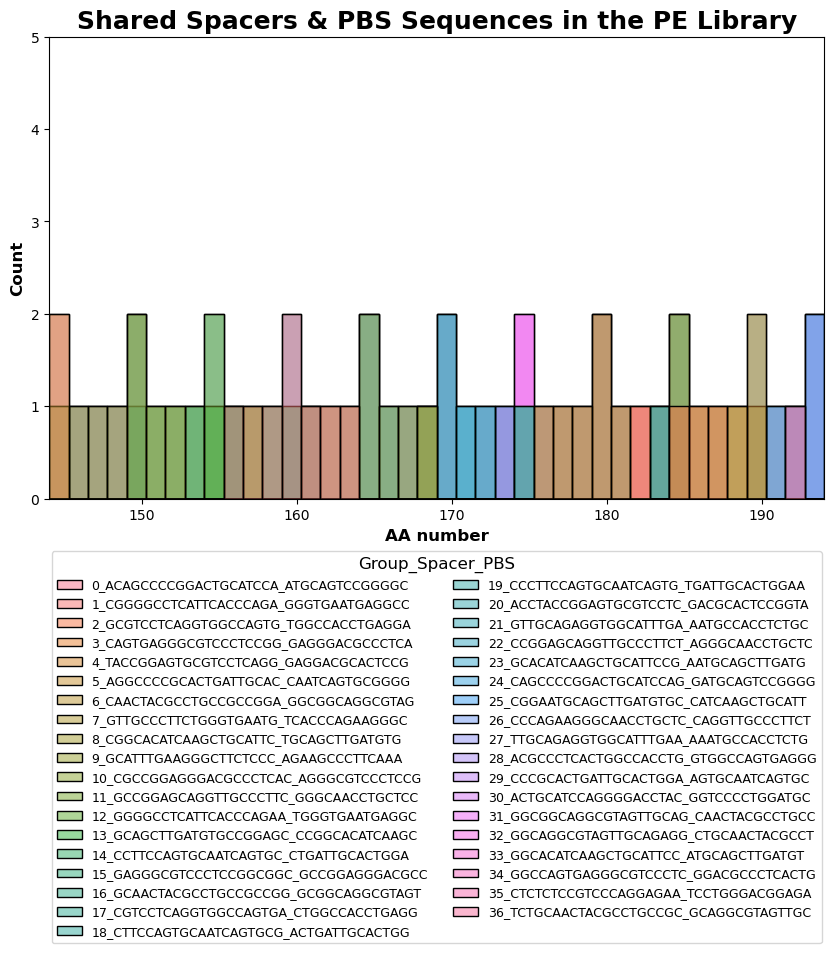

,pegRNA_numbers,Strand,Edits,Spacer_sequence,PBS_sequence,AA_numbers,AA_numbers_min,AA_numbers_max,AA_numbers_continuous
0,[2916],-,[R192W],ACAGCCCCGGACTGCATCCA,ATGCAGTCCGGGGC,[192],192,192,True
1,"[721, 724, 727, 730, 733, 736, 739, 742, 748, ...",+,"[K156G, K156E, K156D, K156V, K156A, K156R, K15...",CGGGGCCTCATTCACCCAGA,GGGTGAATGAGGCC,"[156, 157, 158, 159, 160, 161, 162, 163]",156,163,True
2,"[2436, 2522, 2525, 2528, 2531, 2534, 2537, 254...",-,"[R184W, A186G, A186E, A186D, A186V, A186R, A18...",GCGTCCTCAGGTGGCCAGTG,TGGCCACCTGAGGA,"[184, 186, 187]",184,187,False
3,"[1923, 1926, 1929, 1932, 1935, 1938, 1941, 194...",-,"[L176G, L176E, L176D, L176V, L176A, L176R, L17...",CAGTGAGGGCGTCCCTCCGG,GAGGGACGCCCTCA,"[176, 177, 178, 179, 180, 181, 182]",176,182,True
4,"[2641, 2644, 2647, 2650, 2653, 2656, 2659, 266...",-,"[T188G, T188E, T188D, T188V, T188A, T188R, T18...",TACCGGAGTGCGTCCTCAGG,GAGGACGCACTCCG,"[188, 189, 190]",188,190,True
5,"[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, ...",-,"[F144G, F144E, F144D, F144V, F144A, F144R, F14...",AGGCCCCGCACTGATTGCAC,CAATCAGTGCGGGG,"[144, 145]",144,145,True
6,"[2401, 2404, 2407, 2410, 2413, 2416, 2419, 242...",+,"[R184G, R184E, R184D, R184V, R184A, R184S, R18...",CAACTACGCCTGCCGCCGGA,GGCGGCAGGCGTAG,"[184, 185, 186, 187, 188]",184,188,True
7,"[63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 9...",-,"[Q145G, Q145E, Q145D, Q145V, Q145A, Q145R, Q14...",GTTGCCCTTCTGGGTGAATG,TCACCCAGAAGGGC,"[145, 146, 147, 148, 149, 150, 151, 152]",145,152,True
8,"[1467, 1475]",+,"[G168M, G168W]",CGGCACATCAAGCTGCATTC,TGCAGCTTGATGTG,[168],168,168,True
9,"[1056, 1082, 1085, 1088, 1091, 1094, 1097, 110...",-,"[R161W, H162G, H162E, H162D, H162V, H162A, H16...",GCATTTGAAGGGCTTCTCCC,AGAAGCCCTTCAAA,"[161, 162, 163, 164, 165, 166, 167, 168]",161,168,True


In [87]:
shared_sequences(pegRNAs=pegRNAs,hist_plot=True)